<a href="https://colab.research.google.com/github/longhoang472/CE340_project/blob/main/RIP_current_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip 'drive/MyDrive/rip_currents-main'

Kết quả truyền trực tuyến bị cắt bớt đến 5000 dòng cuối.
  inflating: rip_currents-main/CVPR2023 Rip Current Segmentation - A Novel Benchmark and YOLOv8 Baseline Results/training data/with_rips/images/rip-205.jpg  
  inflating: rip_currents-main/CVPR2023 Rip Current Segmentation - A Novel Benchmark and YOLOv8 Baseline Results/training data/with_rips/images/rip-2050.jpg  
  inflating: rip_currents-main/CVPR2023 Rip Current Segmentation - A Novel Benchmark and YOLOv8 Baseline Results/training data/with_rips/images/rip-2051.jpg  
  inflating: rip_currents-main/CVPR2023 Rip Current Segmentation - A Novel Benchmark and YOLOv8 Baseline Results/training data/with_rips/images/rip-2052.jpg  
  inflating: rip_currents-main/CVPR2023 Rip Current Segmentation - A Novel Benchmark and YOLOv8 Baseline Results/training data/with_rips/images/rip-2053.jpg  
  inflating: rip_currents-main/CVPR2023 Rip Current Segmentation - A Novel Benchmark and YOLOv8 Baseline Results/training data/with_rips/images/rip-2

In [ ]:
import pandas as pd
import numpy as np
import torch as torch
import matplotlib.pyplot as plt
import imageio.v2 as iio
import cv2 as cv2

(640, 640, 3)


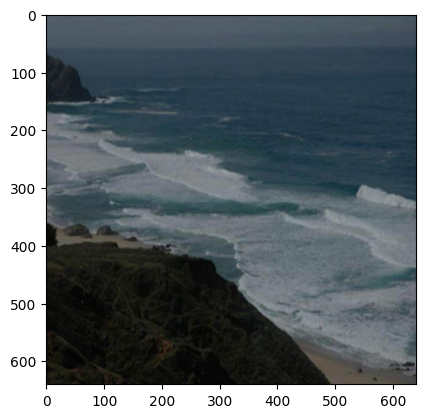

In [ ]:
img = iio.imread(r'/content/rip_currents-main/CVPR2023 Rip Current Segmentation - A Novel Benchmark and YOLOv8 Baseline Results/training data/with_rips/images/rip-001.jpg')
plt.imshow(img)
print(img.shape)

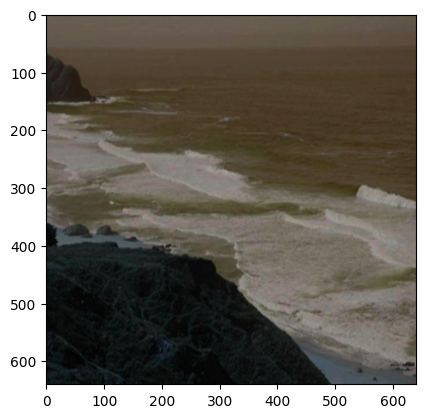

In [ ]:
img = cv2.imread(r'/content/rip_currents-main/CVPR2023 Rip Current Segmentation - A Novel Benchmark and YOLOv8 Baseline Results/training data/with_rips/images/rip-001.jpg')
plt.imshow(img, cmap='gray')


In [ ]:
label = open(r'/content/rip_currents-main/CVPR2023 Rip Current Segmentation - A Novel Benchmark and YOLOv8 Baseline Results/training data/with_rips/labels/rip-001.txt')
print(label.read())

0 0.52734375 0.52421875 0.4796875 0.0734375
1 0.265246938431155 0.40253232353431045 0.19772953592140646 0.4121776667499888 0.11220749274239161 0.4353264904676169 0.11124295842082384 0.44657939088590826 0.11156446986134641 0.46008287138785803 0.12686894786506653 0.4571917062086463 0.15128301036506653 0.4571917062086463 0.15561153721294427 0.45365264257740573 0.17136559779855226 0.4565462455421093 0.17862676036506656 0.4396135812086463 0.23331426036506656 0.4308245187086463 0.2596814478650665 0.4200823312086463 0.2733533228650665 0.4112932687086463
1 0.7499999999999999 0.5212113206502714 0.6953125000000001 0.5260941331502715 0.6777343750000001 0.5065628831502714 0.5878906250000002 0.5094925706502715 0.5673828125000001 0.5153519456502715 0.5009765625000002 0.4997269456502715 0.43847656250000017 0.5065628831502714 0.32617187500000017 0.5026566331502714 0.2861328124999999 0.4860550706502715 0.20703125 0.4870316331502715 0.14843750000000017 0.4665238206502715 0.07617187500000018 0.4831253831

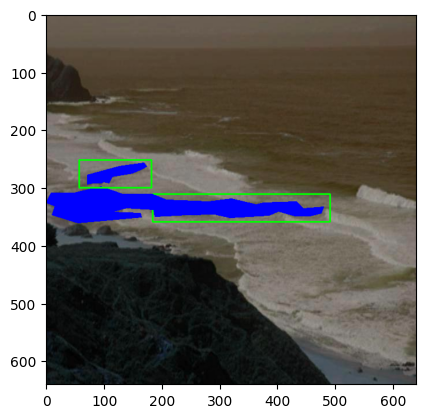

In [ ]:
img = cv2.imread(r'/content/rip_currents-main/CVPR2023 Rip Current Segmentation - A Novel Benchmark and YOLOv8 Baseline Results/training data/with_rips/images/rip-001.jpg')
h, w = img.shape[:2]
label = open(r'/content/rip_currents-main/CVPR2023 Rip Current Segmentation - A Novel Benchmark and YOLOv8 Baseline Results/training data/with_rips/labels/rip-001.txt')

for line in label:
  line = line.split()
  if line[0] == '1':
    points = np.array(line[1:], dtype=np.float32).reshape(-1, 2)
    points *= [w, h]
    points = points.astype(np.int32)
    cv2.fillPoly(img, [points], color=(0,0,255))
  else:
    x_center, y_center, box_w, box_h = line[1:]
    x_center = float(x_center)
    y_center = float(y_center)
    box_w = float(box_w)
    box_h = float(box_h)
    x1 = int((x_center - box_w/2) * w)
    y1 = int((y_center - box_h/2) * h)
    x2 = int((x_center + box_w/2) * w)
    y2 = int((y_center + box_h/2) * h)
    cv2.rectangle(img, (x1, y1), (x2, y2), (0,255,0), 2)

plt.imshow(img)
